In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import math
from scipy.stats import norm
from random import randint
from collections import Counter

# Time Series Analysis

<AxesSubplot:xlabel='Date', ylabel='Number of Patents Disclosed'>

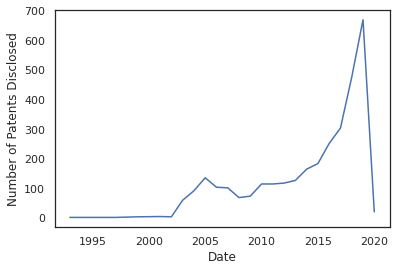

In [2]:
#Time Series Analysis
data = pd.read_csv('DATE.csv')

#caculate the number of each degree
num=[] 
num=data['Year']
num2={} #dictionary
for i in num:
    if i not in num2:
        num2[i]=1
    else:
        num2[i]=num2[i]+1


#Ranking
num3=Counter(num2).most_common() 

#change list into dictionary
num2=dict(num3)

#creat an empty dataframe and store Date and Number of Patents Disclosed into it
columns = ["Date","Number of Patents Disclosed"]
df = pd.DataFrame(columns=columns)
df['Date']=num2.keys()
df['Number of Patents Disclosed']=num2.values()
# Plot
sns.set_theme(style="white")
sns.lineplot(x="Date", y="Number of Patents Disclosed",
             data=df)

### Here we find that the number of year 2020 is not appropriate

In [3]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos =list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row, col))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

In [4]:
#Find the index of numbers that are not appropriate for ploting 
#and delete the rows that include these numbers.
listOfPositions = getIndexes(df, 2020) # here the number of 2020 is not ok
m=list()
for i in range(len(listOfPositions)):
    m.append(listOfPositions[i][0])
for i in range(len(m)):
    print(m[i])
    df.drop(index=m[i],inplace= True)
print(df)

17
    Date  Number of Patents Disclosed
0   2019                          670
1   2018                          476
2   2017                          304
3   2016                          252
4   2015                          184
5   2014                          165
6   2005                          136
7   2013                          127
8   2012                          118
9   2010                          115
10  2011                          115
11  2006                          104
12  2007                          102
13  2004                           92
14  2009                           74
15  2008                           69
16  2003                           60
18  2001                            5
19  1999                            4
20  2002                            4
21  1998                            3
22  1993                            2
23  1997                            2


### And then we do the lineplot again

<AxesSubplot:xlabel='Date', ylabel='Number of Patents Disclosed'>

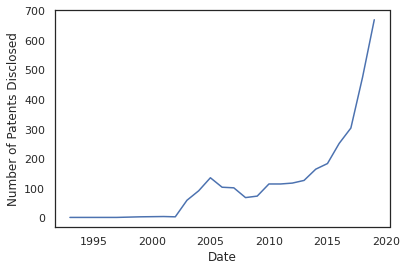

In [5]:
# Plot
sns.set_theme(style="white")
sns.lineplot(x="Date", y="Number of Patents Disclosed",
             data=df)

<AxesSubplot:xlabel='Year', ylabel='Number of Patents'>

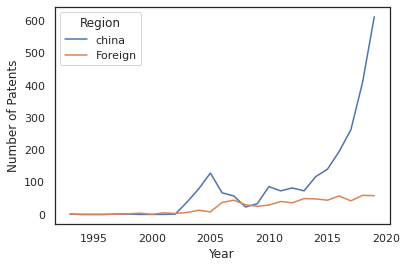

In [6]:
data = pd.read_csv('patent numbers (foreign and china).csv')
# Plot the responses for different events and regions

sns.set_theme(style="white")
sns.lineplot(x="Year", y="Number of Patents",
             hue="Region",
             data=data)

# Patent Distribution in China

[('Guangdong', 563), ('Beijing', 511), ('Jiangsu', 376), ('Shanghai', 345), ('Shandong', 190), ('Zhejiang', 189), ('Sichuan', 122), ('Hunan', 119), ('Tianjin', 102), ('Hubei', 94), ('Henan', 94), ('Shanxi', 89), ('Anhui', 89), ('Liaoning', 88), ('Heilongjiang', 58), ('Fujian', 56), ('Chongqing', 54), ('Jilin', 50), ('Hebei', 45), ('Jiangxi', 43), ('Yunnan', 39), ('Taiwan', 37), ('Guangxi', 35), ('Hongkong', 31), ('Guizhou', 22), ('Xinjiang', 17), ('Gansu', 16), ('Neimenggu', 6), ('Qinghai', 6), ('Hainan', 6), ('Ningxia', 5)]
[11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]


<AxesSubplot:xlabel='Province/Cities'>

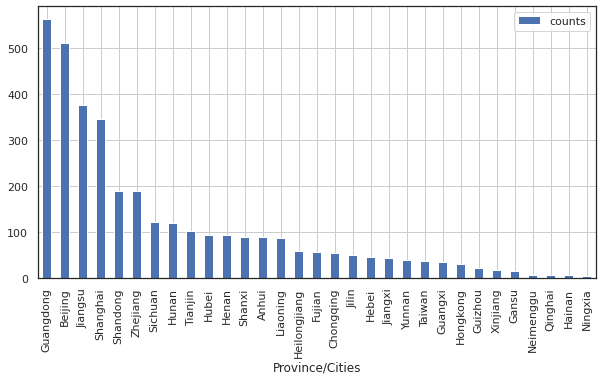

In [7]:
data = pd.read_csv('region_domestic.csv')
#caculate the number of each degree
num=[] 
num=data['Province/Cities']
num2={} #dictionary
for i in num:
    if i not in num2:
        num2[i]=1
    else:
        num2[i]=num2[i]+1


#Ranking
num3=Counter(num2).most_common() 
print(num3)

#change list into dataframe
num2=dict(num3)
df2= pd.DataFrame(num3,columns=['Province/Cities','counts'])
m=np.arange(11,31)
print(m)
#for i in range(len(m)):
#    df2.drop(index=m[i],inplace= True)
#print(df2)
df2.plot.bar(x ='Province/Cities', y = ['counts'], grid = True,figsize = (10,5))

In [8]:
def getIndexes(dfObj, value):
    ''' Get index positions of value in dataframe i.e. dfObj.'''
    listOfPos =list()
    # Get bool dataframe with True at positions where the given value exists
    result = dfObj.isin([value])
    # Get list of columns that contains the value
    seriesObj = result.any()
    columnNames = list(seriesObj[seriesObj == True].index)
    # Iterate over list of columns and fetch the rows indexes where value exists
    for col in columnNames:
        rows = list(result[col][result[col] == True].index)
        for row in rows:
            listOfPos.append((row))
    # Return a list of tuples indicating the positions of value in the dataframe
    return listOfPos

{'Guangdong': 563, 'Beijing': 511, 'Jiangsu': 376, 'Shanghai': 345, 'Shandong': 190, 'Zhejiang': 189, 'Sichuan': 122, 'Hunan': 119, 'Tianjin': 102, 'Hubei': 94, 'Henan': 94, 'Shanxi': 89, 'Anhui': 89, 'Liaoning': 88, 'Heilongjiang': 58, 'Fujian': 56, 'Chongqing': 54, 'Jilin': 50, 'Hebei': 45, 'Jiangxi': 43, 'Yunnan': 39, 'Taiwan': 37, 'Guangxi': 35, 'Hongkong': 31, 'Guizhou': 22, 'Xinjiang': 17, 'Gansu': 16, 'Neimenggu': 6, 'Qinghai': 6, 'Hainan': 6, 'Ningxia': 5}
[[25, 26, 33, 41, 293, 294, 295, 412, 721, 767, 887, 900, 1295, 1377, 1416, 1426, 1448, 1451, 1468, 1598, 1711, 1732, 1901, 1924, 2020, 2150, 2180, 2184, 2235, 2246, 2247, 2248, 2271, 2300, 2311, 2312, 2313, 2321, 2360, 2370, 2402, 2555, 2569, 2603, 2610, 2620, 2653, 2670, 2714, 2987, 3070, 3082, 3127, 3211, 3226, 3461], [30, 105, 157, 158, 421, 513, 558, 591, 786, 890, 1153, 1312, 1319, 1462, 1622, 1798, 1806, 1869, 1934, 1985, 1987, 1991, 1997, 2079, 2494, 2539, 2553, 2558, 2600, 2642, 2735, 2806, 2836, 2837, 2838, 2853, 28

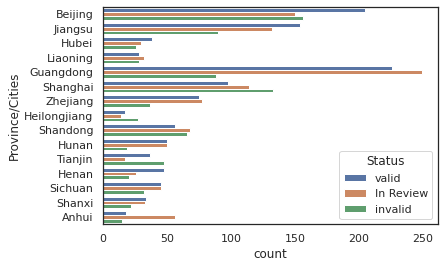

In [9]:
import seaborn as sns
num2=dict(num3)
print(num2)
sns.set_theme(style="white")
data = pd.read_csv('region_domestic.csv')

df2= pd.DataFrame(data,columns=['Province/Cities','Status'])

k=['Fujian', 'Chongqing', 'Jilin', 'Hebei', 'Jiangxi', 'Yunnan', 'Taiwan', 'Guangxi', 'Hongkong', 'Guizhou', 'Xinjiang', 'Gansu', 'Neimenggu', 'Qinghai', 'Hainan', 'Ningxia']

#for i in range(16):
#    listOfPositions.append(getIndexes(df2, k[i]))
listOfPositions=list()
for i in range(len(k)):
    listOfPositions.append(getIndexes(df2,k[i]))
print(listOfPositions)
z=list()
for i in range(len(listOfPositions)):
    for m in range(len(listOfPositions[i])):
        df2.drop(index=listOfPositions[i][m],inplace= True)  
ax = sns.countplot(y="Province/Cities", hue="Status", data=df2)